In [2]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv("Wine.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       177 non-null    int64  
 1   14.23   177 non-null    float64
 2   1.71    177 non-null    float64
 3   2.43    177 non-null    float64
 4   15.6    177 non-null    float64
 5   127     177 non-null    int64  
 6   2.8     177 non-null    float64
 7   3.06    177 non-null    float64
 8   .28     177 non-null    float64
 9   2.29    177 non-null    float64
 10  5.64    177 non-null    float64
 11  1.04    177 non-null    float64
 12  3.92    177 non-null    float64
 13  1065    177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [5]:
df.describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.isnull().sum()

1        0
14.23    0
1.71     0
2.43     0
15.6     0
127      0
2.8      0
3.06     0
.28      0
2.29     0
5.64     0
1.04     0
3.92     0
1065     0
dtype: int64

<AxesSubplot:xlabel='1', ylabel='count'>

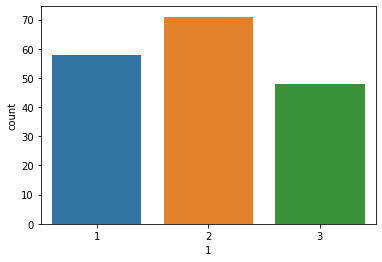

In [8]:
sns.countplot(x = '1',data=df)

In [9]:
target = df['1']
df = df.drop('1',axis=1)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(df,target,test_size =0.20,random_state=42)

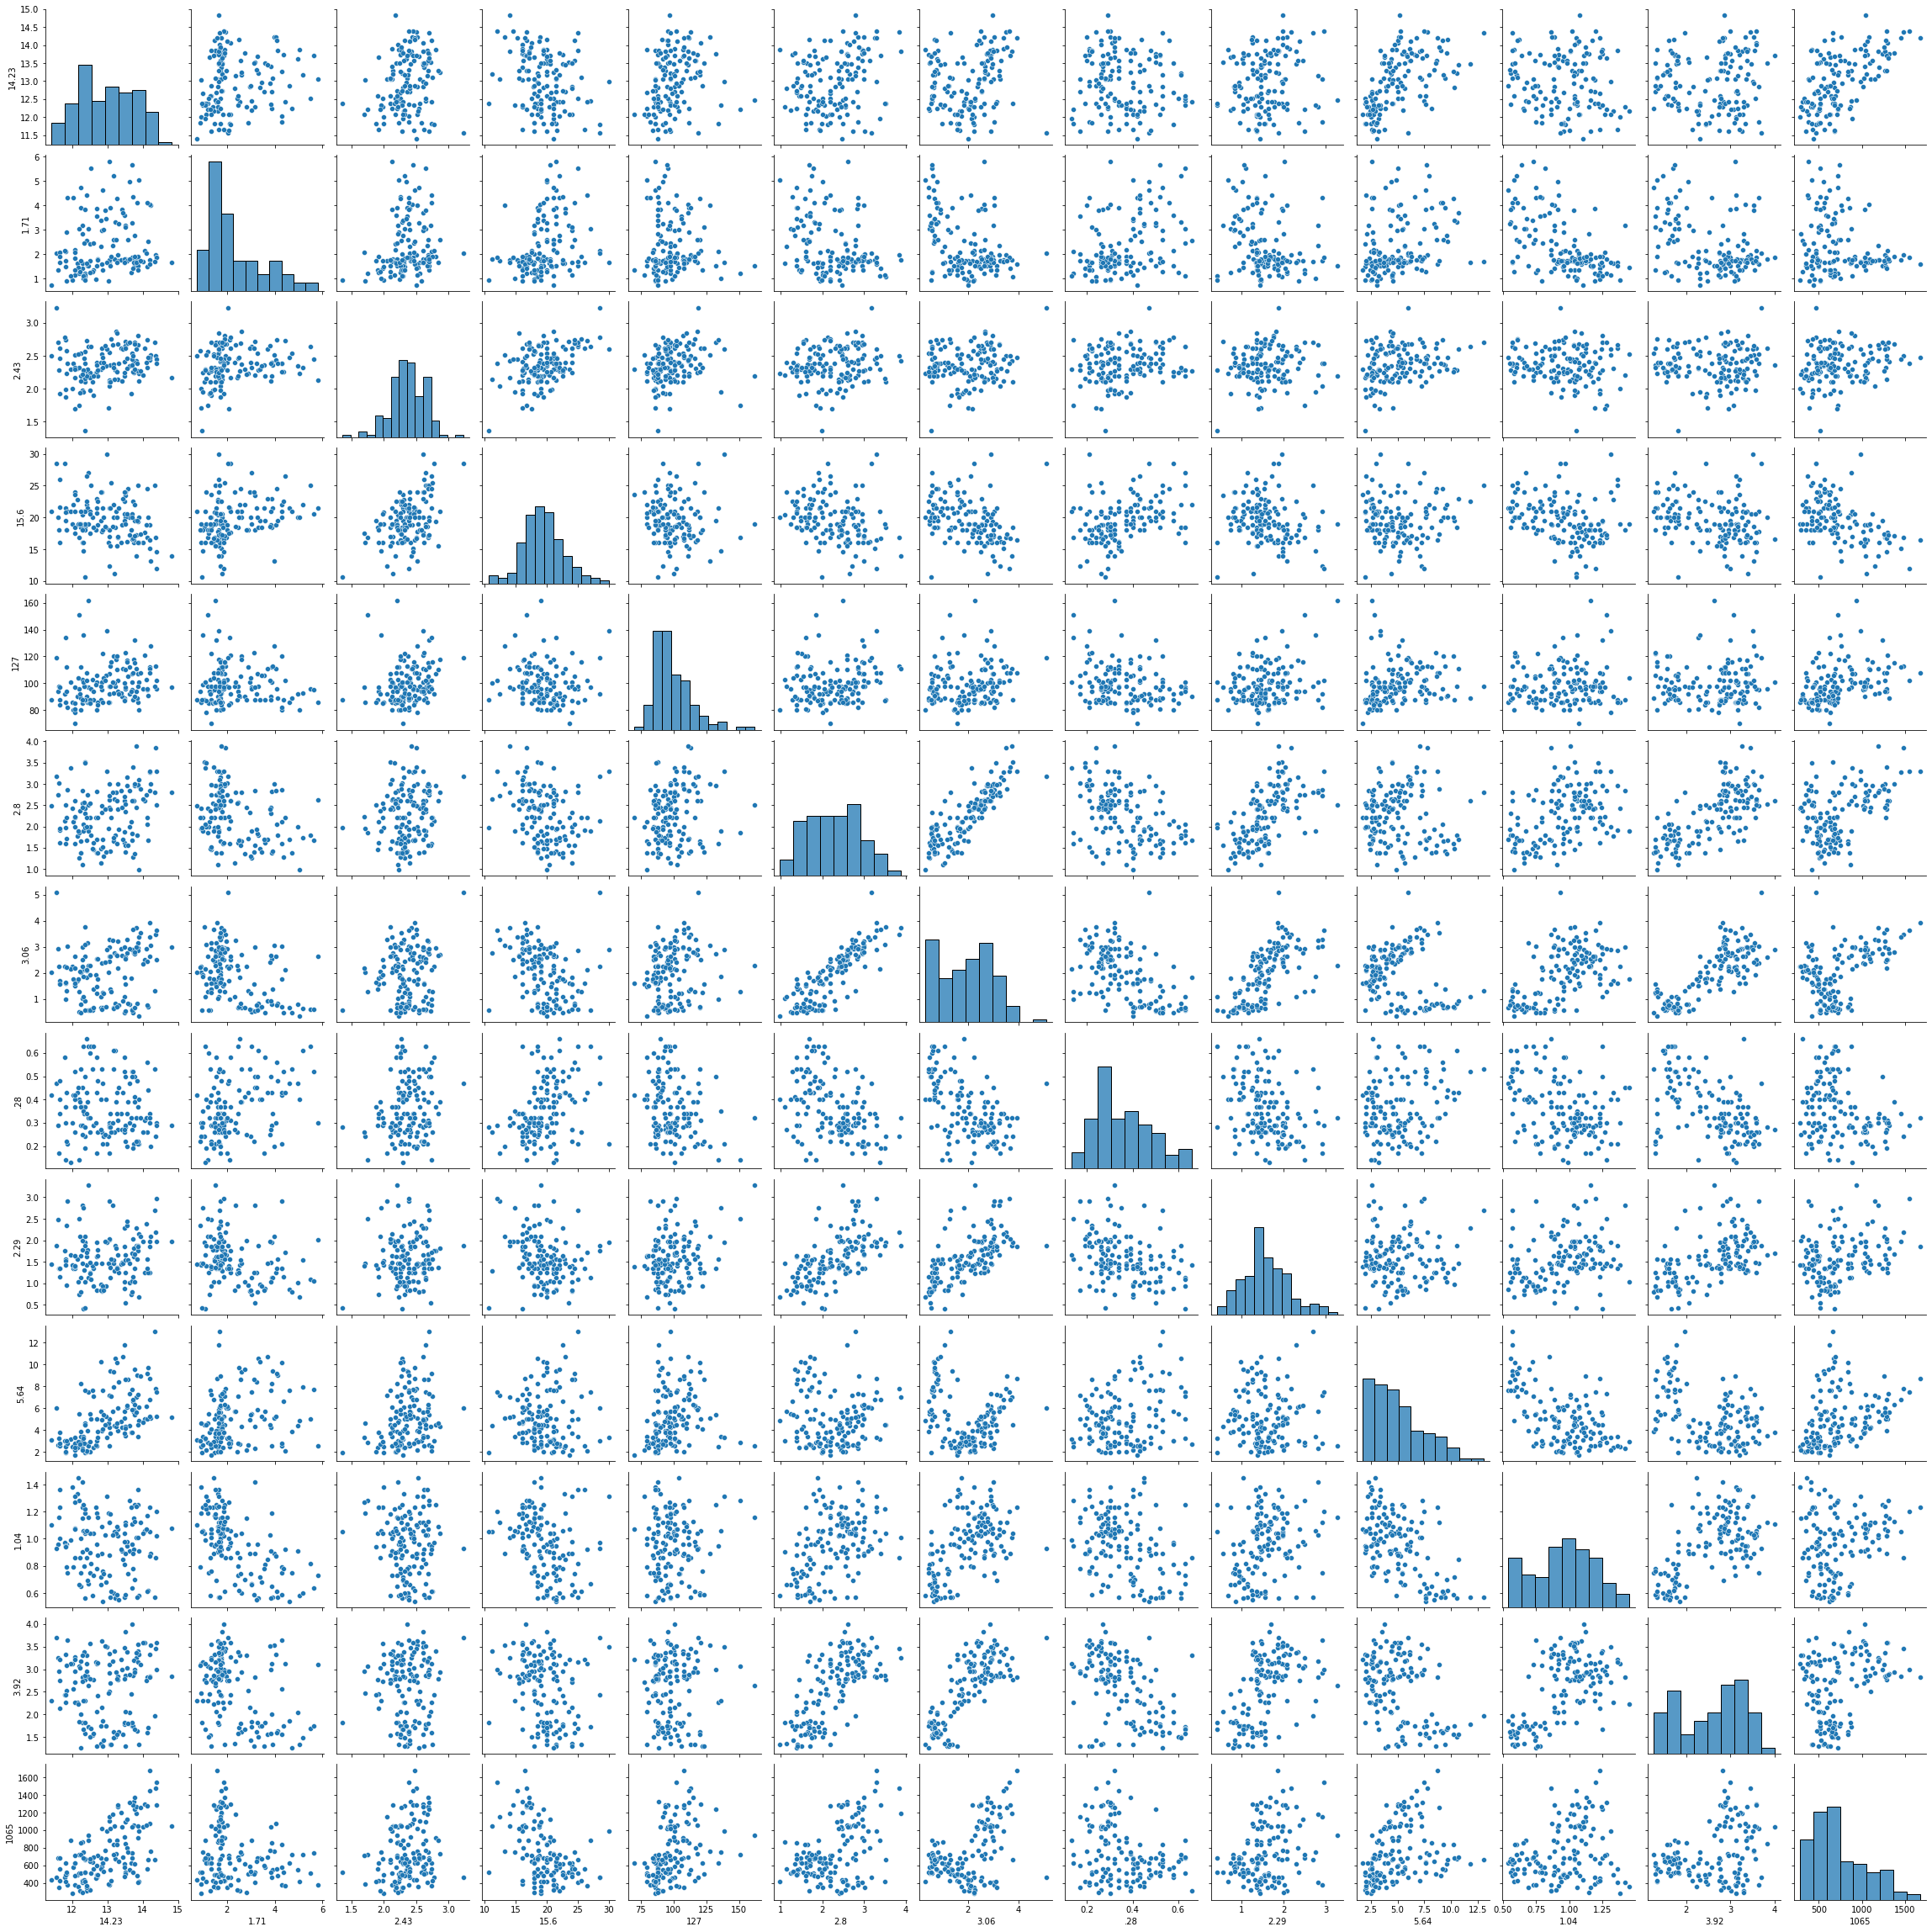

In [12]:
sns.pairplot(X_train)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

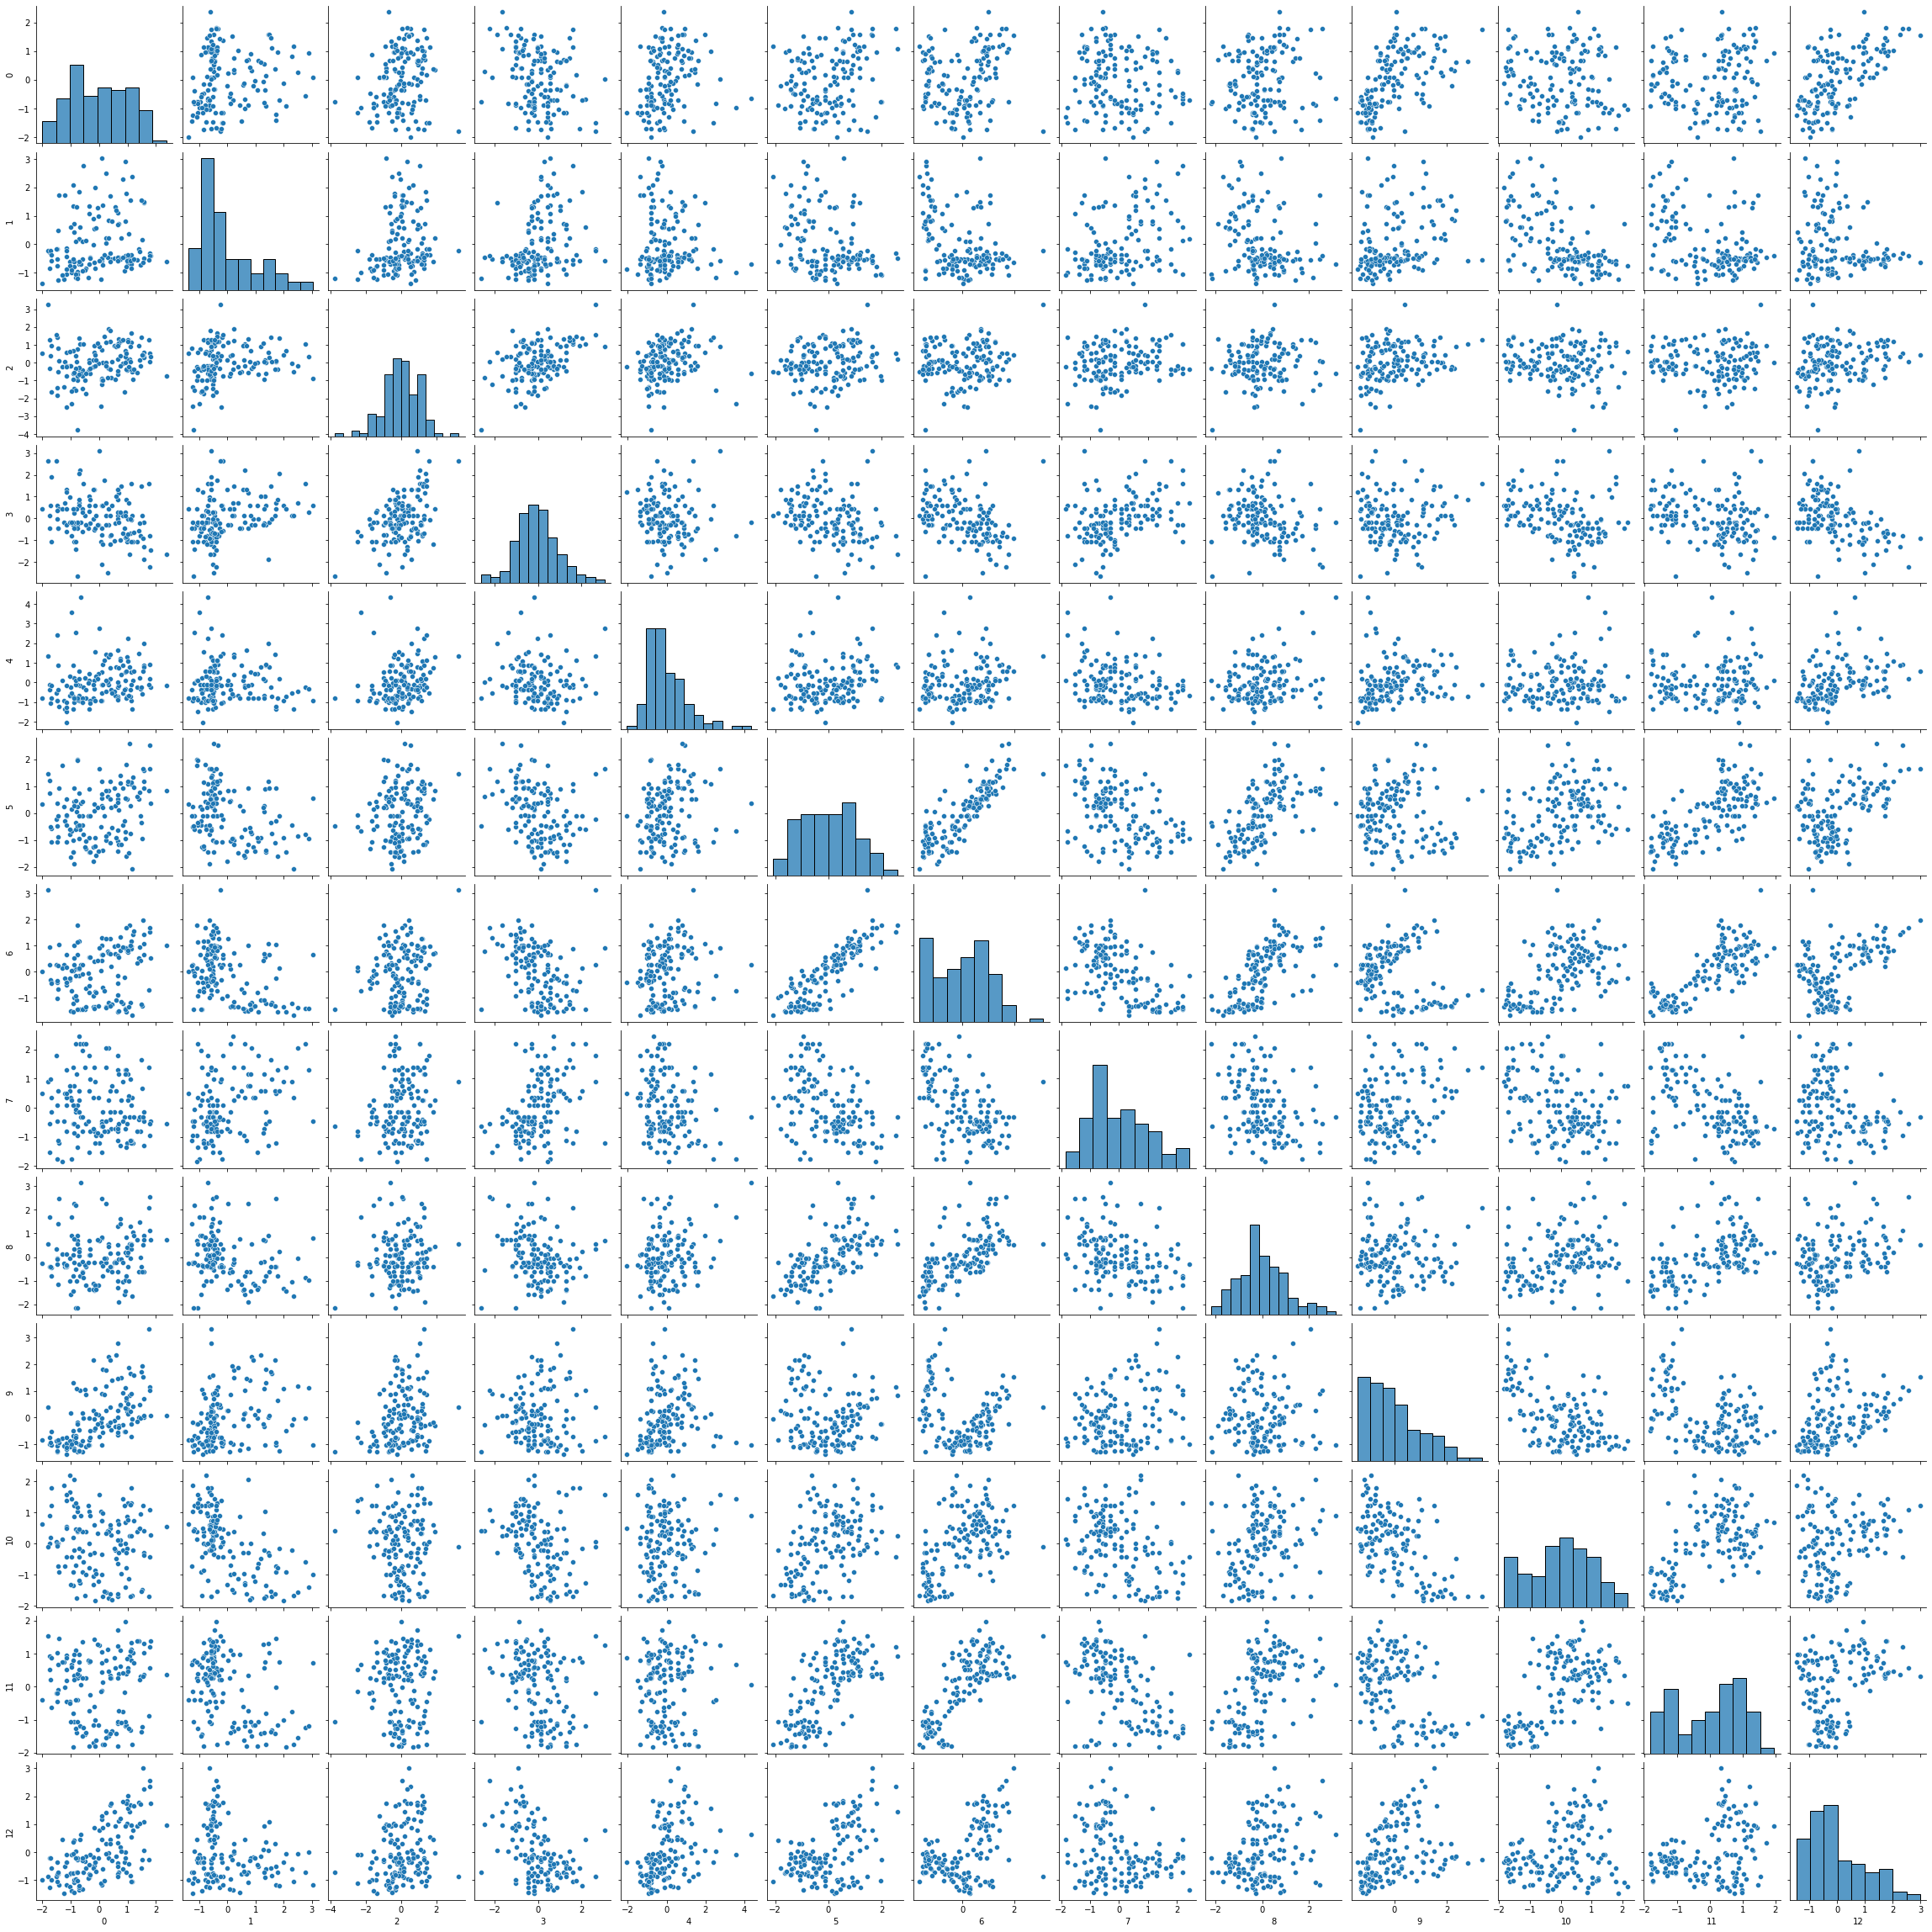

In [15]:
sns.pairplot(X_train)

In [17]:
model  = LogisticRegression()
model.fit(X_train,y_train)
model

LogisticRegression()

In [18]:
print("The classification_report is:{}".format(classification_report(y_test,model.predict(X_test))))

The classification_report is:              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.71      0.83        14
           3       0.67      1.00      0.80         8

    accuracy                           0.89        36
   macro avg       0.89      0.90      0.88        36
weighted avg       0.93      0.89      0.89        36



<AxesSubplot:>

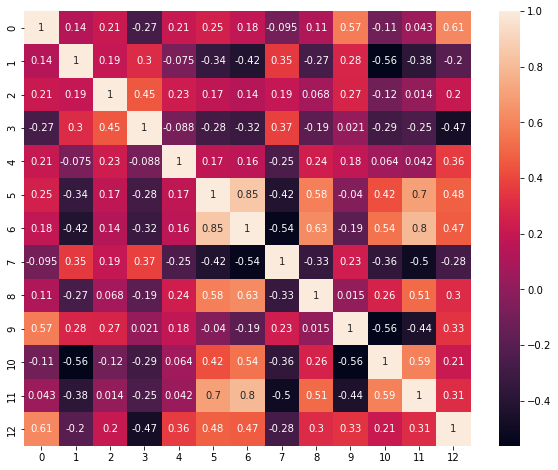

In [20]:
plt.figure(figsize =(10,8))
sns.heatmap(X_train.corr(),annot=True) 

In [21]:
pca = PCA(n_components=2)
tr_comp = pca.fit_transform(X_train)
ts_comp = pca.transform(X_test)

Text(0, 0.5, 'PC2')

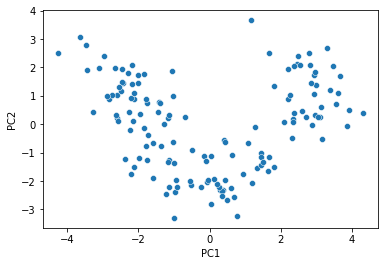

In [22]:
sns.scatterplot(tr_comp[:,0],tr_comp[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")

In [23]:
pc_model = LogisticRegression()
pc_model.fit(tr_comp,y_train)
pc_model

LogisticRegression()

In [24]:
print("The classification report is: {}".format(classification_report(y_test,pc_model.predict(ts_comp))))

The classification report is:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.93      0.96        14
           3       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

